In [169]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray , rgba2rgb
from skimage.filters import threshold_otsu
from skimage.filters import threshold_local

In [158]:

def show_images(images,titles=None):
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()
    

<ipython-input-182-f2047d8650f7>:3: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image = rgb2gray(temp)*255


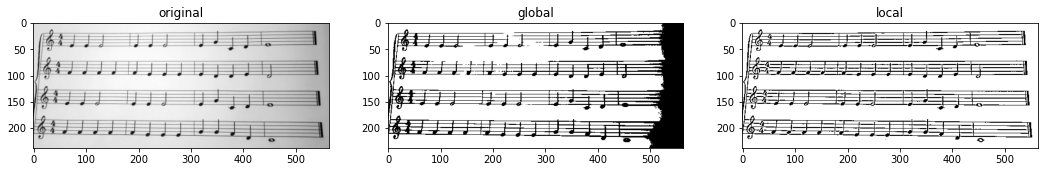

In [182]:

image = io.imread("sample2.png")
temp = image.copy()
image = rgb2gray(temp)*255

global_thresh = threshold_otsu(image)
binary_global = image > global_thresh

block_size = 9
local_thresh = threshold_local(image, block_size, offset= 3)
binary_local = image > local_thresh
show_images([image ,  binary_global ,binary_local] , ["original" , "global" , "local"] ) 